# Programming for Chemistry 2025/2026 @ UniMI

![logo](logo_small.png "Logo")

## Lecture 16: Machine Learning with Scikit-Learn

Machine learning (ML) is a hot topic with popular applications in driverless cars, internet search engines, and data analysis among many others. Numerous fields are utilizing machine learning, and chemistry is certainly no exception, with papers using machine learning methods being published regularly. There is a considerable amount of hype around the topic along with debate about whether the field will live up to this hype. However, there is little doubt that machine learning is making a significant impact and is a powerful tool when used properly.

**Machine learning** occurs when a program exhibits behavior that is not explicitly programmed but rather is **learned** from data.

Most of the material of this lecture is taken from this [lecture notes](https://weisscharlesj.github.io/SciCompforChemists/notebooks/chapter_13/chap_13_notebook.html).

**Scikit-Learn** is a collection of algorithms built on top of *NumPy*, *SciPy* and *Pandas*. **Pandas** is a package for data analysis and manipulation. In this course I will not enter into the details of the Pandas package, since we will just use it's basic functions to load data from various file formats.

Scikit-Learn (aka **sklearn**) is organized into subpackages covering different machine learning techniques. The most important are:

* Preprocessing
* Regression
* Classification
* Dimensionality reduction
* Clustering
* ...

## 1. Getting started with sklearn
Sklearn can be imported by `import sklearn`. You can also import individual functions such as `from sklearn.linear_regression import LinearRegresion`. 

Since sklearn depends heavily on NumPy, we need also to ``import numpy as np``. We will also import the Pandas package with `import pandas as pd`. We also import Matplotlib to visualize the results.

Scikit-learn should be already installed in Anaconda. Under Linux/WSL you can install the official packages from your distribution. Otherwise, you can install any version of NumPy in a virtual environment using `pip` or `conda`.

Typically one does:
```bash
conda create myenvinronment
conda activate myenvironment
conda install scikit-learn pandas
```
or
```bash
python -m venv myenvironment
. myenvironment/bin/activate
pip install scikit-learn pandas
```

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print(sklearn.__version__)

1.2.1


## 2. Supervised learning
*Supervised learning* is where the machine learning algorithms are provided with both **feature** and **target** information with the goal of developing a model to predict targets based on the features. When the supervised machine learning predictions are looking to categorize an item like a photo or type of metal complex, it is known as **classification**; and when the predictions are seeking a numerical value from a continuous range, it is a **regression** problem. Some machine learning algorithms are designed for only classification or only regression while others can do either.

### 2.1 Features and Information

The file titled `ROH_data.csv` contains information on over seventy simple alcohols (i.e., a single -OH with no other non-hydrocarbon function groups) including their boiling points. Our goal is to generate a function or algorithm to predict the boiling points of the alcohols based on the information on the alcohols, so here the target is the boiling point and features are the other information about the alcohols.

The dataset includes the boiling point (K), molecular weight (g/mol), number of carbon atoms, whether or not it is aliphatic, degree, whether it is cyclic, and the average position of any aryl substituents. Scikit-learn requires that all features be represented numerically, so for the last three features `1` represents `True` and `0` represents `False`.

In [3]:
# load a data set of alchools
ROH = pd.read_csv('data/ROH_data.csv', sep=',')

# display the beginning of the data set
ROH.head()

bp     MW  carbons  degree  aliphatic  avg_aryl_position  cyclic
0  338  32.04        1       1          1                0.0       0
1  351  46.07        2       1          1                0.0       0
2  371  60.10        3       1          1                0.0       0
3  356  60.10        3       2          1                0.0       0
4  391  74.12        4       1          1                0.0       0

In [4]:
# print a summary of the data set
ROH.describe()

bp          MW    carbons     degree  aliphatic  \
count   72.000000   72.000000  72.000000  72.000000  72.000000   
mean   432.097222  108.928333   6.611111   1.722222   0.750000   
std     44.518127   26.388742   1.954090   0.610293   0.436051   
min    338.000000   32.040000   1.000000   1.000000   0.000000   
25%    403.250000   98.640000   6.000000   1.000000   0.750000   
50%    425.500000  108.140000   7.000000   2.000000   1.000000   
75%    470.500000  122.170000   8.000000   2.000000   1.000000   
max    534.000000  186.330000  12.000000   3.000000   1.000000   

       avg_aryl_position     cyclic  
count          72.000000  72.000000  
mean            0.715278   0.277778  
std             1.519420   0.451046  
min             0.000000   0.000000  
25%             0.000000   0.000000  
50%             0.000000   0.000000  
75%             0.000000   1.000000  
max             6.000000   1.000000

Let's plot the boiling point with respect to the other quantities in the data set, in order to see is the is any correlation. Note that Pandas is fully compatible with Matplotlib.

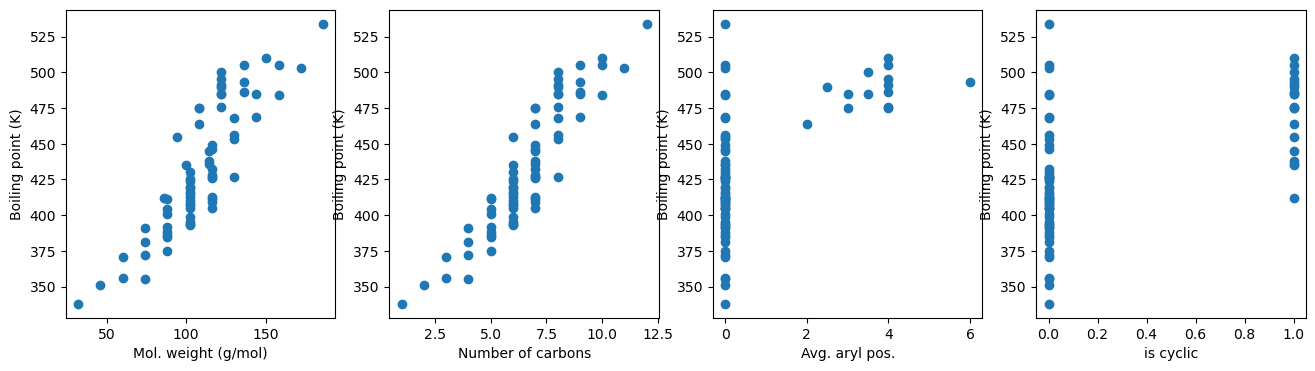

In [9]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.scatter(ROH['MW'], ROH['bp'])
plt.xlabel('Mol. weight (g/mol)')
plt.ylabel('Boiling point (K)')

plt.subplot(1,4,2)
plt.scatter(ROH['carbons'], ROH['bp'])
plt.xlabel('Number of carbons')
plt.ylabel('Boiling point (K)')

plt.subplot(1,4,3)
plt.scatter(ROH['avg_aryl_position'], ROH['bp'])
plt.xlabel('Avg. aryl pos.')
plt.ylabel('Boiling point (K)')

plt.subplot(1,4,4)
plt.scatter(ROH['cyclic'], ROH['bp'])
plt.xlabel('is cyclic')
plt.ylabel('Boiling point (K)')

plt.show()

### 2.2 Train-test split
Whenever training a machine learning model to make predictions, it is important to evaluate the accuracy of the predictions. It is unfair to test an algorithm on data it has already seen, so before training a model, first **split** the dataset into a training subset and a testing subset. It is also important to shuffle the dataset before splitting it as many datasets are at least partially ordered.

Scikit-learn provides a built-in function for shuffling and splitting the dataset known as `train_test_split()`. The arguments are the features, target, and the fraction of the dataset to be used for testing. Below, a quarter of the dataset is allotted for testing (`test_size=0.25`).

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# target is the property we are going to model (fit)
target = ROH['bp']

# features are the variables targets depends on
features = ROH[ ['MW', 'carbons', 'degree', 'aliphatic', 'avg_aryl_position','cyclic'] ]

In [12]:
# random_state is like a random seed, to make results reproducible
# by convention we use capital X or Y if they are multidimensional,
# lower letter x or y if they are one-dimensional data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

print("training data points:", len(X_train))
print("testing data points :", len(X_test))

training data points: 54
testing data points : 18


### 2.3 Linear regression

Now for some machine learning using a very simple *linear regression* model. This model treats the target value as a linear combination or weighted sum of the features where $x$ are the features and $w$ are the weights.

$$ target = w_0X_0 + w_1X_1 + w_2X_2 + w_3X_3 + w_4X_4 + w_5X_5 + ... $$

The general procedure for supervised machine learning, regardless of model, usually includes three steps.

1. Create a model and attach it to an *object*
2. Train the model with the training data
3. Evaluate the model using the testing data or use it to make predictions

To implement these steps, the linear model from the `linear_model` module is first created with the `LinearRegression()` function and assigned the variable `reg`. Next, it is trained using the `fit()` method and the training data from above.

Finally, it is important to evaluate the effectiveness of trained machine learning models before rolling them out for widespread use, and scikit-learn provides multiple built-in functions to help in this task. The first is the `score()` method. Instead of making predictions using the testing features and then plotting the predictions against the known values, the `score()` method takes in the testing features and target values and returns the $r^2$. The closer the $r^2$ value is to 1, the better the predictions are.

In [13]:
from sklearn import linear_model

In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# let's print the first four predicted values
prediction = reg.predict(X_test)
print("predicted boiling points:", prediction[0:4])
print("true boiling points     :", np.array(y_test[0:4]))

# the model score is:
print('model score=', reg.score(X_test, y_test))

predicted boiling points: [521.94389573 439.60028899 421.38488633 485.6143471 ]
true boiling points     : [510 449 430 491]
model score= 0.9738116533899367


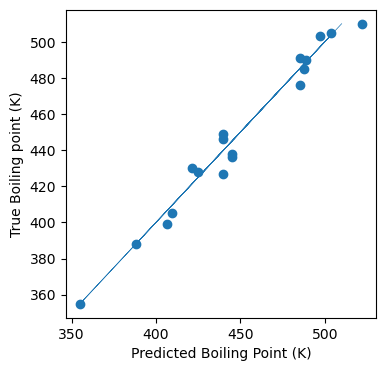

In [16]:
# let's plot the predicted boiling points
plt.figure(figsize=(4,4))

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test, linewidth=0.5)

plt.xlabel('Predicted Boiling Point (K)')
plt.ylabel('True Boiling point (K)')
plt.show()

### 2.4 Coefficients
Recall that the linear model calculates the boiling point based on a weighted sum of the features, so it can be informative to know the weights to see which features are the most influential in making the predictions. The `LinearRegression()` method contains the attribute `coef_` which provides these coefficients in a NumPy array.

These coefficients correspond to molecular weight, number of carbons, degree, whether or not it is aliphatic, average aryl position, and whether or not it is cyclic, respectively. While some coefficients are larger than others, we cannot yet distinguish which features are more important than the others because the values for each feature occur in different ranges. This is because the coefficients are not only proportional to the predictive value of a feature but also inversely proportional to the magnitude of feature values. For example, while the molecular mass has greater predictive value than the degree, the degree has a larger coefficient because it occurs in a smaller range (1 $\rightarrow$ 3) than the molecular weights (32.04 $\rightarrow$ 186.33 g/mol).

In [17]:
# remember that the feature of the model are:
print(features.head())

print("coefficents=", reg.coef_)
print("intercept  =", reg.intercept_)

      MW  carbons  degree  aliphatic  avg_aryl_position  cyclic
0  32.04        1       1          1                0.0       0
1  46.07        2       1          1                0.0       0
2  60.10        3       1          1                0.0       0
3  60.10        3       2          1                0.0       0
4  74.12        4       1          1                0.0       0
coefficents= [ -5.06283477  89.19634615 -14.99163129   5.73273187  -2.05508033
  15.9368917 ]
intercept  = 412.78616575428737


### 2.5 Preprocessing, scaling
To understanf which coefficient is more important for the fit, we need to scale the features to the same range. Three common feature scaliess this issue, the scikit-learn `sklearn.preprocess` module provides a selection of functions to scale or normalize the features data.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

print(scaled_features[0:5])

[[0.         0.         0.         1.         0.         0.        ]
 [0.09093266 0.09090909 0.         1.         0.         0.        ]
 [0.18186532 0.18181818 0.         1.         0.         0.        ]
 [0.18186532 0.18181818 0.5        1.         0.         0.        ]
 [0.27273316 0.27272727 0.         1.         0.         0.        ]]


In [20]:
# let's repeat the linear regression and check the coefficients
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=18)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
# it is clear that the first two coefficients are the most important
print("coefficents=", reg.coef_)
print("intercept  =", reg.intercept_)
print('model score=', reg.score(X_test, y_test))

coefficents= [-781.14477682  981.15980764  -29.98326258    5.73273187  -12.33048201
   15.9368917 ]
intercept  = 324.77765455057386
model score= 0.9738116533899377


### Exercise
Let's play with the `features`. Try to remove some of them, perform the linear regression and see if the model score improves or not.

In [25]:
# target is the property we are going to model (fit)
target = ROH['bp']

# features are the variables targets depends on
features_list = ['MW', 'carbons', 'degree', 'aliphatic', 'avg_aryl_position', 'cyclic']
#features_list.remove('cyclic')
#features_list.remove('degree')
features_list.remove('carbons')
features_list.remove('MW')

print('feature_list=', features_list)
features = ROH[ features_list ]

# scale the features
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=18)

# perform the linear regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("coefficents=", reg.coef_)
print("intercept  =", reg.intercept_)
print('model score=', reg.score(X_test, y_test))

feature_list= ['degree', 'aliphatic', 'avg_aryl_position', 'cyclic']
coefficents= [-23.734375   -28.7047619   50.19047619  13.5859375 ]
intercept  = 450.4860119047619
model score= 0.5617419270435947


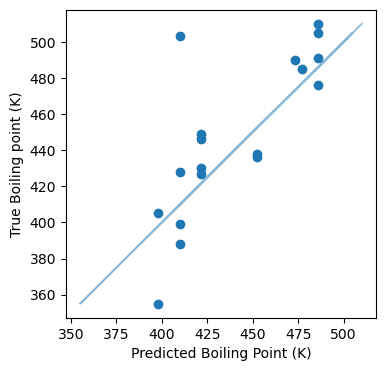

In [26]:
# plot the predicted boiling points
prediction = reg.predict(X_test)
plt.figure(figsize=(4,4))

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)

plt.xlabel('Predicted Boiling Point (K)')
plt.ylabel('True Boiling point (K)')
plt.show()

### 2.6 Classification of discrete variables: random forests
If the target property is a **discrete** variable instead of a continous variable (i.e. the boiling point), we will perfom **classifiaction**. In this examles classification involves sorting items into discrete categories such as sorting **alcohols**, **aldehydes/ketones**, and **amines** by type based on features. 

Scikit-learn provides a number of algorithms for classification. One method is the **decision tree** which sorts items into categories based on a series of  conditions. You can think it as a series of `if/elif/else` conditions based on the dataset features. For instance:

* `if` degrees of unsaturation `> 0` most likely aldehydes or ketones `else` alcohols or amines
* ...then you should work out yourself other conditions like this

**This is the power of machine learning:** decitions trees and random forests (i.e. training a large ensemble of decision trees on different subsets of the dataset) is let the computer learn from data and write code for you.

![random_forest](random_forest.png "Random forest")


### 2.7 Classifiy chemical compounds
We will use a small dataset containing 122 monofunctional organic compounds from three different categories: **alcohols (category 0)**, **ketones/aldehydes (category 1)**, and **amines (category 2)**. The **features** provided are the *molecular weight*, *number of carbons*, *boiling point*, whether it is *cyclic*, whether it is *aromatic*, and the *unsaturation number*.

In [27]:
data = pd.read_csv('data/org_comp.csv')
data.head()

class   bp      MW  C  cyclic  aromatic  unsaturation
0      0  455   94.11  6       1         1             3
1      0  475  108.14  7       1         1             3
2      0  475  108.14  7       1         1             3
3      0  464  108.14  7       1         1             3
4      0  474  122.17  8       1         1             3

In [28]:
# let's choose the target and the features
target = data['class']
features = data[ ['bp', 'MW', 'C', 'cyclic', 'aromatic', 'unsaturation'] ] 

In [29]:
# as usual we split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

In [30]:
# let's classify using a RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print('model score=', rf.score(X_test, y_test))

model score= 0.6774193548387096


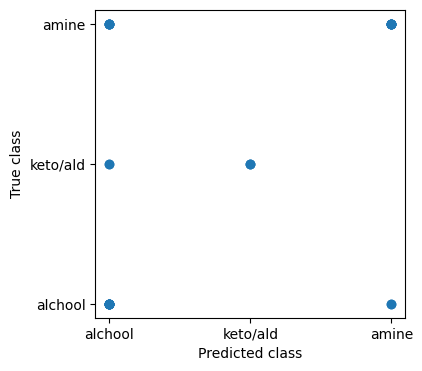

In [31]:
# plot the predicted molecule class
plt.figure(figsize=(4,4))

plt.scatter(prediction, y_test)

plt.xlabel('Predicted class')
plt.xticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.yticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.ylabel('True class')
plt.show()

In [32]:
# in this case it is better to plot the confusion matrix,
# which tells us how many times the predicted class was correct
# or incorrect
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, prediction)
print(conf.shape)
print(conf)

(3, 3)
[[10  0  2]
 [ 2  3  0]
 [ 6  0  8]]


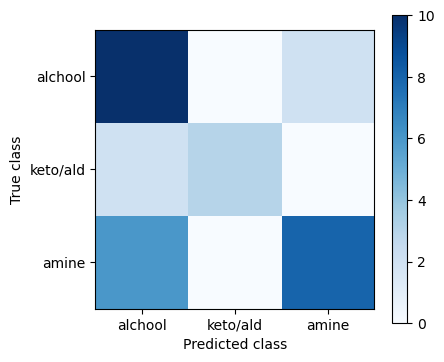

In [33]:
# let's plot the confusion matrix
plt.figure(figsize=(4.5,4))

plt.imshow(conf, cmap='Blues')
plt.colorbar()

plt.xlabel('Predicted class')
plt.xticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.yticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.ylabel('True class')
plt.show()

### Exercise
Let's play with the `features`. Try to remove some of them, perform the linear regression and see if the model score improves or not.

In [37]:
# let's choose the target and the features
target = data['class']
feature_list = ['bp', 'MW', 'C', 'cyclic', 'aromatic', 'unsaturation']
feature_list.remove('bp')
feature_list.remove('aromatic')
feature_list.remove('unsaturation')
features = data[ feature_list ] 

# as usual we split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

# let's classify using a RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print('model score=', rf.score(X_test, y_test))

conf = confusion_matrix(y_test, prediction)
print(conf)

model score= 0.6451612903225806
[[10  0  2]
 [ 2  2  1]
 [ 6  0  8]]


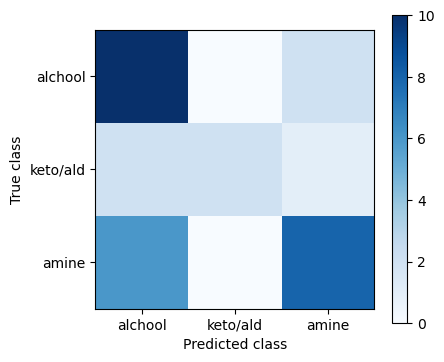

In [38]:
# let's plot the confusion matrix
plt.figure(figsize=(4.5,4))

plt.imshow(conf, cmap='Blues')
plt.colorbar()

plt.xlabel('Predicted class')
plt.xticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.yticks(ticks=[0,1,2], labels=['alchool', 'keto/ald', 'amine'])
plt.ylabel('True class')
plt.show()

## 3. Unsupervised Learning
*Unsupervised learning* is when no target value is provided to the machine learning algorithm. Unsupervised learning seeks to **find patterns** in the data instead of making predictions.

One form of unsupervised ML is **dimensionality reduction** where the number of features is condensed down to typically two or three features while maintaining as much information as possible.

Another unsupervised learning task is **clustering** where the algorithm attempts to group similar items in a dataset.

### 3.1 Dimensional Reduction
When your dataset has multiple *features*, it is of course difficult to visualize. Let's consider star constellations for a geometrical analogy. Constellations appear to be group of close-by stars on the 2d plane, but actually stars are distant from each other in the 3d space.  

![constellation](constellation.png "Star constellation")

Dimensional reduction aims at finding the **best projection (hyper-)plane** such that items which are close in the high-dimensional space, they are also close in the reduced space.

**Principal Component Analysys** forms linear combinations of the features and tries to condense them down to 2-3 *most important* features, that you can visualize.

We will use scikit-learn’s `datasets` module, which contains datasets along with data-generating functions. We will use the wine classification dataset that includes 178 samples of three different types of wines, which we will classify based on features such as alcohol content, hue, malic acid, etc.

### 3.2 Load and inspect the wine dataset
To load the wine dataset, we first need to import the `load_wine()` function and then call the function.

In [39]:
from sklearn.datasets import load_wine
wine = load_wine()

In [40]:
# the wine dataset has several attributes. The data attribute is NumPy array
features = wine.data
print(features.shape)
print(features)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [41]:
# the columns are 13 features, and their names are
print(len(wine.feature_names))
print(wine.feature_names)

13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 3.3 Scale the features and peform the PCA
It is always best to preprocess the data, since the numeric range of the features may vary by order of magnitude. Here we don't need to split the dataset, because we are not performing any prediction.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scale the data such that every feature has mean value=0 and standard deviation=1 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# reduce to two features
pca = PCA(n_components=2)
trans_data = pca.fit_transform(scaled_features)
print(trans_data.shape)

(178, 2)


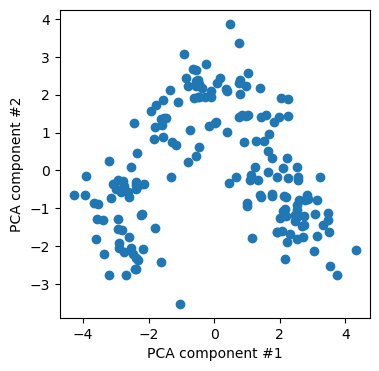

In [43]:
# let's plot the 2-dim features
plt.figure(figsize=(4,4))
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.xlabel('PCA component #1')
plt.ylabel('PCA component #2')
plt.show()

In [44]:
# display the linear combinations of the 13 features
components = pca.components_
print(components.shape)

for j in range(2):
    print(f'PCA component #{j+1}: ', end='')
    for i in range(len(wine.feature_names)):
        feat = wine.feature_names[i]
        print(f'{components[j,i]:+.2f}*{feat} ', end='')
    print()
    

(2, 13)
PCA component #1: +0.14*alcohol -0.25*malic_acid -0.00*ash -0.24*alcalinity_of_ash +0.14*magnesium +0.39*total_phenols +0.42*flavanoids -0.30*nonflavanoid_phenols +0.31*proanthocyanins -0.09*color_intensity +0.30*hue +0.38*od280/od315_of_diluted_wines +0.29*proline 
PCA component #2: -0.48*alcohol -0.22*malic_acid -0.32*ash +0.01*alcalinity_of_ash -0.30*magnesium -0.07*total_phenols +0.00*flavanoids -0.03*nonflavanoid_phenols -0.04*proanthocyanins -0.53*color_intensity +0.28*hue +0.16*od280/od315_of_diluted_wines -0.36*proline 


### 3.4 Clustering
Clustering involves grouping similar items in a dataset. The are several clustering algorithms: **k-means**, **agglomerative clustering**, and **Density Based Spatial Clustering Application with Noise (DBSCAN)**. 

Here we will try to see if the reduced 2-dimensional wine dataset (the `trans_data` NumPy array) can be clustered into **classes** of wine. The clustering algorithms will try to assign a label (from 0 to number of cluster - 1) to each datapoint, that we can use to plot with different colors.

In [45]:
from sklearn.cluster import KMeans

In [56]:
# let's try with two or three clusters
kmeans = KMeans(n_clusters=3, random_state=18, n_init="auto")
kmeans.fit(trans_data)

labels = kmeans.labels_
print(labels)

centers = kmeans.cluster_centers_
print(centers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 2.28888211 -0.95994724]
 [-0.07601834  1.73606061]
 [-2.74392982 -1.2141906 ]]


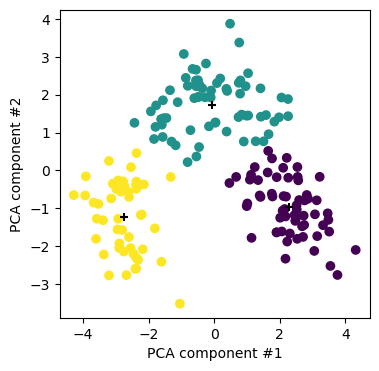

In [57]:
# plot the clusters and their centers
plt.figure(figsize=(4,4))
plt.scatter(trans_data[:,0], trans_data[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='+', color='black')
plt.xlabel('PCA component #1')
plt.ylabel('PCA component #2')
plt.show()

In reality the wine dataset has a `target` attribute, that stands for the quality of the wine (0=bad, 1=good, 2=excellent). In fact we can use the wine dataset for *supervised learning* as well. Let's compare the *labels* obtained with `KMeans` with the *targets* of the orignal dataset.

In [58]:
target = wine.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


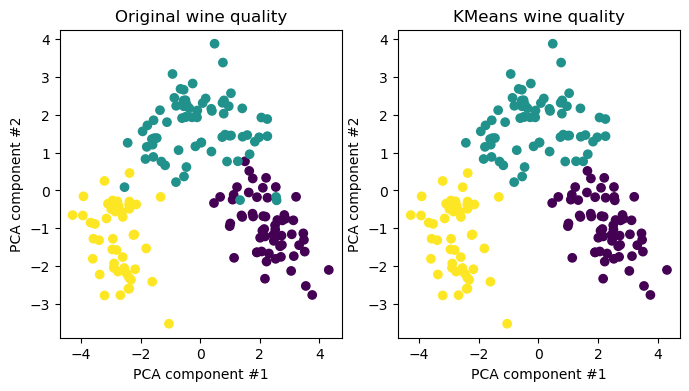

In [59]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(trans_data[:,0], trans_data[:,1], c=target)
plt.title('Original wine quality')
plt.xlabel('PCA component #1')
plt.ylabel('PCA component #2')

plt.subplot(1,2,2)
plt.scatter(trans_data[:,0], trans_data[:,1], c=labels)
plt.title('KMeans wine quality')
plt.xlabel('PCA component #1')
plt.ylabel('PCA component #2')

plt.show()

In [60]:
# and finally, the confusion matrix
conf = confusion_matrix(target, labels)
print(conf)

[[58  1  0]
 [ 3 67  1]
 [ 0  0 48]]


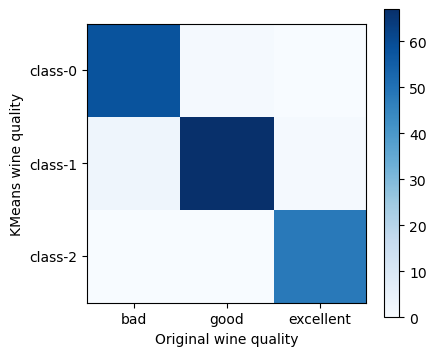

In [61]:
plt.figure(figsize=(4.5,4))

plt.imshow(conf, cmap='Blues')
plt.colorbar()

plt.xlabel('Original wine quality')
plt.xticks(ticks=[0,1,2], labels=['bad', 'good', 'excellent'])
plt.ylabel('KMeans wine quality')
plt.yticks(ticks=[0,1,2], labels=['class-0', 'class-1', 'class-2'])
plt.show()

### Final exercise: Random forest on wine data
Let's perform a supervised learning using Random forests. Remember to:

1. split the dataset into training and testing
2. perform the Random Forest and print the score
3. calculate the confusion matrix

Copy and paste from the cells above.

In [62]:
target = wine.target
features = wine.data

In [63]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

# classify using a RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('model score=', rf.score(X_test, y_test))

# calculate the confusion matrix
prediction = rf.predict(X_test)
conf = confusion_matrix(y_test, prediction)
print(conf)

model score= 0.9333333333333333
[[15  2  0]
 [ 0 16  1]
 [ 0  0 11]]


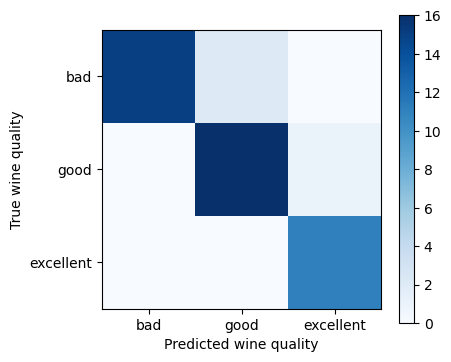

In [64]:
# plot the confusion matrix
plt.figure(figsize=(4.5,4))

plt.imshow(conf, cmap='Blues')
plt.colorbar()

plt.xlabel('Predicted wine quality')
plt.xticks(ticks=[0,1,2], labels=['bad', 'good', 'excellent'])
plt.ylabel('True wine quality')
plt.yticks(ticks=[0,1,2], labels=['bad', 'good', 'excellent'])

plt.show()